Цель: 

Продемонстрировать, как различные онлайн-алгоритмы машинного обучения  работают на наборе данных digits из библиотеки scikit-learn. 
Задача: 

    Классификация рукописных цифр (0–9).
    Сравнение алгоритмов при разных долях обучающей/тестовой выборок.
    Построение графика зависимости ошибки от размера обучающей выборки.
     

Используемые алгоритмы: 

    SGDClassifier
    ASGDClassifier (усреднённый SGD)
    Perceptron
    PassiveAggressiveClassifier I / II
    LogisticRegression с SAG-оптимизатором
     

Источник данных: 

    Датасет: sklearn.datasets.load_digits() — содержит ~1800 изображений рукописных цифр (размер каждого изображения — 8x8 пикселей).
     

Препроцессинг данных

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets
from sklearn.linear_model import (
    LogisticRegression,
    PassiveAggressiveClassifier,
    Perceptron,
    SGDClassifier,
)
from sklearn.model_selection import train_test_split

# Доли тестовой выборки
heldout = [0.95, 0.90, 0.75, 0.50, 0.01]

# Число повторений для усреднения
rounds = 10

# Загрузка данных
X, y = datasets.load_digits(return_X_y=True)

print("Форма данных:", X.shape)
print("Количество классов:", len(np.unique(y)))

Форма данных: (1797, 64)
Количество классов: 10


Обучение модели

In [2]:
# Список моделей для сравнения
classifiers = [
    ("SGD", SGDClassifier(max_iter=110)),
    ("ASGD", SGDClassifier(max_iter=110, average=True)),
    ("Perceptron", Perceptron(max_iter=110)),
    ("Passive-Aggressive I", PassiveAggressiveClassifier(
        max_iter=110, loss="hinge", C=1.0, tol=1e-4)),
    ("Passive-Aggressive II", PassiveAggressiveClassifier(
        max_iter=110, loss="squared_hinge", C=1.0, tol=1e-4)),
    ("SAG", LogisticRegression(
        max_iter=110, solver="sag", tol=1e-1, C=1.0e4 / X.shape[0])),
]

xx = 1.0 - np.array(heldout)  # пропорции обучающей выборки

results = {}

# Цикл по всем моделям
for name, clf in classifiers:
    print(f"Обучение модели: {name}")
    yy = []
    for i in heldout:
        errors = []
        for r in range(rounds):
            # Разделение выборки
            X_train, X_test, y_train, y_test = train_test_split(
                X, y, test_size=i, random_state=np.random.RandomState(42)
            )
            # Обучение
            clf.fit(X_train, y_train)
            # Предсказание
            y_pred = clf.predict(X_test)
            # Вычисление ошибки
            error_rate = 1 - np.mean(y_pred == y_test)
            errors.append(error_rate)
        yy.append(np.mean(errors))
    results[name] = yy

Обучение модели: SGD
Обучение модели: ASGD
Обучение модели: Perceptron
Обучение модели: Passive-Aggressive I
Обучение модели: Passive-Aggressive II
Обучение модели: SAG


Визуализация результатов

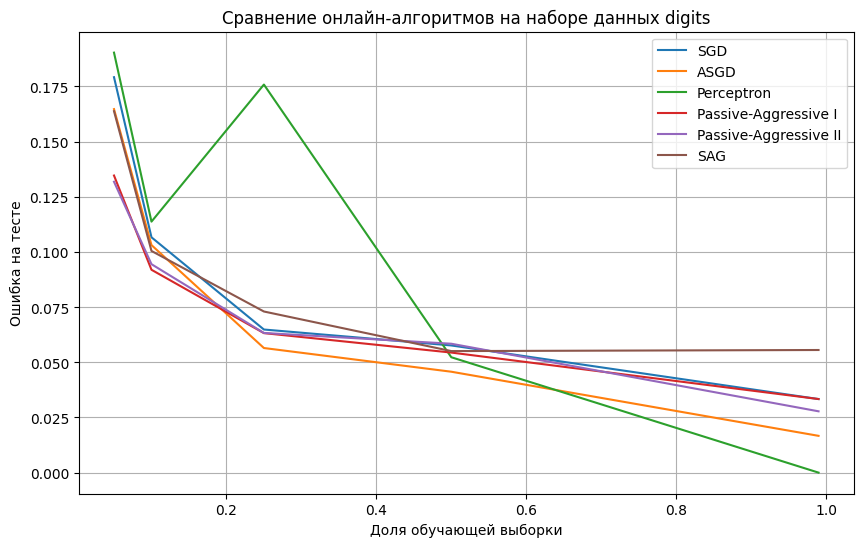

In [3]:
plt.figure(figsize=(10, 6))

for name, values in results.items():
    plt.plot(xx, values, label=name)

plt.legend(loc="upper right")
plt.xlabel("Доля обучающей выборки")
plt.ylabel("Ошибка на тесте")
plt.title("Сравнение онлайн-алгоритмов на наборе данных digits")
plt.grid(True)
plt.show()

Интерпретация результатов 

На графике показана зависимость ошибки на тестовой выборке  от доли обучающих данных  для каждой модели. 
Что можно заметить: 

    SGDClassifier : работает хорошо при большом количестве данных, но менее стабильно при малых объёмах.
    ASGDClassifier : более стабильный за счёт усреднения весов.
    Perceptron : простой и быстрый, но может не достигать высокой точности.
    PassiveAggressive I/II : реагируют только на ошибки, хорошо подходят для потокового обучения.
    SAG (логистическая регрессия) : показывает хорошую точность при достаточном объёме данных.
     

